<a href="https://colab.research.google.com/github/RituAnilkumar/EarthEngine/blob/master/Exercise3_EarthEngine_to_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"> Google Earth Engine Python API Introductory Tutorial 3 </h1>

**Author:** Ritu Anilkumar


**Last Updated:** 1 May 2020

This tutorial uses Earth Engine's sampleRectangle function to convert the Earth Engine image into a numpy array ready for analysis in a traditional Pythonic treatment. So, to begin, first things first. Import Earth Engine and authenticate.

In [1]:
# Import the earth engine library and authenticate with your credentials
import ee
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=-iY8S5UIQaK9lDBhGd1mMoMre9K17PXb1R0bLQEKVvk&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/zQEsOJ8iZXo1c0o2ADqcEHQ8EcFjZzJ6c0_9pkGfkWtGKqjNrhGEL40

Successfully saved authorization token.


Next step is accessing the Sentinel 2 from Earth Engine, filterating the image collection with our area of interest, date range and metadata. We also perform a resampling and reprojection of the entire image to band 2 so that all bands are scaled to the same resolution before we proceed.

In [0]:
# Create a variable containing the location of our area of interest. Filter data of your choice based on location, dates etc
loc = ee.Geometry.Polygon([[[91.67475389617279, 26.188592551107232], [91.67475389617279, 26.15237544627353], [91.71380540984466, 26.15237544627353], [91.71380540984466, 26.188592551107232]]])
im_col=ee.ImageCollection('COPERNICUS/S2').filterBounds(loc).filterDate(ee.Date('2018-01-01'),ee.Date('2018-12-31'))
im_col=im_col.filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than',2).sort('CLOUDY_PIXEL_PERCENTAGE',True)
im=im_col.first()
im=im.resample('bilinear').reproject(crs= im.select('B2').projection().crs(), scale= 10)

The sampleRectangle function of Earth Engine, as per the Earth Engine documentation, extracts a rectangular region of pixels from an image into a 2D array per band. The arrays are returned as a feature. The features have the same properties (in this case bandnames). The region is specified as the function can take only 262144 pixels

In [0]:
# Get 2-d pixel array for AOI - returns feature with 2-D pixel array as property per band.
band_arrs = im.sampleRectangle(region=loc)


Once the pixels have been converted into a 2 dimensional array, we can extract the data into a numpy array by using the getInfo() and casting it as a numpy array. As the bandnames are translated as properties of the feature array by the sampleRectangle function, if we wanted to convert any band specifically into a numpy array, we use the following code.

In [0]:
import numpy as np
# np.array casts the information yielded by getInfo into a numpy array.
b=np.array(band_arrs.get("QA60").getInfo())

If we were to do this for all the bands, we can wrap it into a for loop. But first we need to create an array with the spatial size and number of bands as the image.

In [0]:
num_bands=im.bandNames().size().getInfo()
# Recall b is the single band extracted and converted into a numpy array. We can use the numpy shape function to obtain the spatial information in terms of rows or columns
b.shape
image = np.zeros((b.shape[0], b.shape[1], num_bands))

In [6]:
# n is the index representing the bands
n=0
for x in im.bandNames().getInfo():
  image[:,:,n]=(np.array(band_arrs.get(x).getInfo()))
  n=n+1
# Let's check the shape if we get it in the desired rows, columns and bands
image.shape

(406, 396, 16)

Now let's try to visualize these new numpy images using matplotlib library's imshow command.

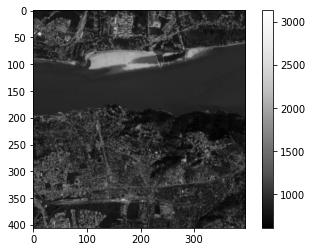

In [7]:
#Importing required libraries
import matplotlib.pyplot as plt

# Plotting in greyscale
plt.imshow(image[:,:,3],cmap=plt.cm.Greys_r)
plt.colorbar()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


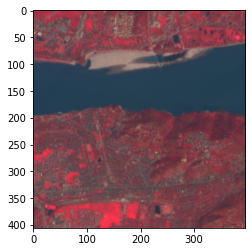

In [8]:
# Displaying an True color composite of Red, Green, Blue
colorComb=np.array([8,3,2])
FCCim=image[:,:,colorComb]
maxVal=max(image[:,:,8].max(),image[:,:,3].max(),image[:,:,2].max())
minVal=min(image[:,:,8].min(),image[:,:,3].min(),image[:,:,2].min())
FCCim=FCCim/(maxVal-minVal)
plt.imshow(FCCim)

There, it's as simple as that. Now before we close, for the travel enthusiasts, this image is of the Brahmaputra river that flows through Assam. It's the longest river in India and this specific spot is known to have sightings of the gangetic dolphin. You know the locations. So pack your bags and travel :) 